<a href="https://colab.research.google.com/github/rpimaster/OAI/blob/main/01-convolution/homework01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [2]:
!wget https://www.agentspace.org/download/panda.zip
!unzip panda.zip

--2025-10-29 15:56:07--  https://www.agentspace.org/download/panda.zip
Resolving www.agentspace.org (www.agentspace.org)... 62.168.101.9
Connecting to www.agentspace.org (www.agentspace.org)|62.168.101.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149062 (146K) [application/zip]
Saving to: ‘panda.zip’

panda.zip           100%[===================>] 145.57K   178KB/s    in 0.8s    

2025-10-29 15:56:10 (178 KB/s) - ‘panda.zip’ saved [149062/149062]

Archive:  panda.zip
   creating: panda/
 extracting: panda/caltech-101.txt   
  inflating: panda/image_0001.jpg    
  inflating: panda/image_0007.jpg    
  inflating: panda/image_0009.jpg    
  inflating: panda/image_0014.jpg    
  inflating: panda/image_0015.jpg    
  inflating: panda/image_0027.jpg    
  inflating: panda/image_0028.jpg    
  inflating: panda/image_0032.jpg    
  inflating: panda/image_0033.jpg    
  inflating: panda/image_0034.jpg    


In [3]:
from torchvision import datasets, transforms
from PIL import Image
import os
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # convert RGB to 1-channel grayscale
    transforms.ToTensor()
])  # converts PIL image to Tensor in [0,1]
image_dir = "./panda"  # path to the directory with images
images = []
for fname in os.listdir(image_dir):
    if fname.lower().endswith((".png", ".jpg", ".jpeg")):  # only image files
        path = os.path.join(image_dir, fname)
        img = Image.open(path).convert("RGB")  # ensure 3 channels
        img_tensor = transform(img)
        images.append(img_tensor)

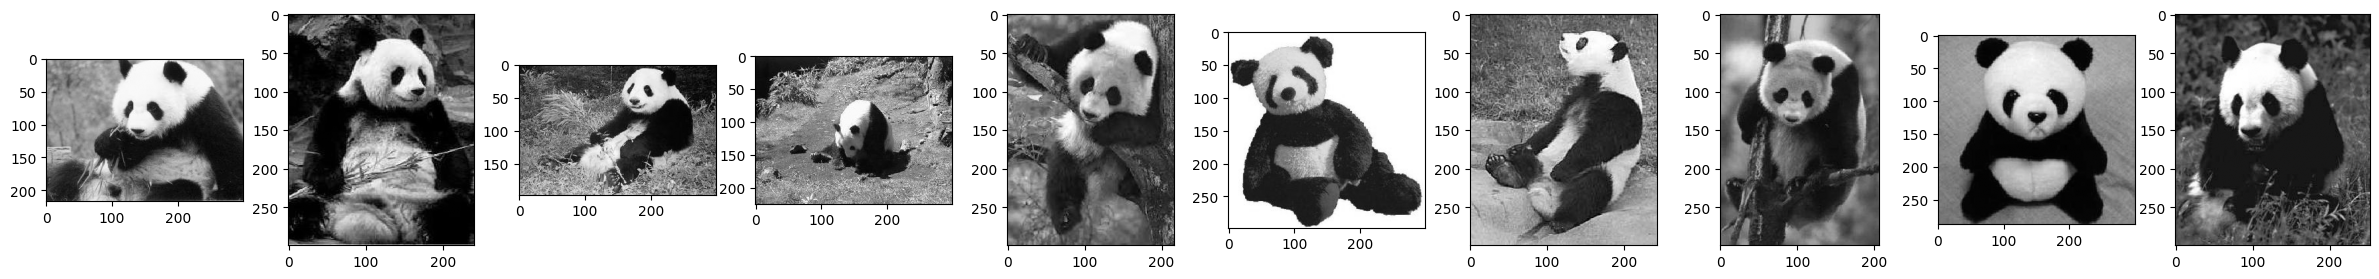

In [4]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, len(images), figsize=(30, 3))
for i in range(len(images)):
    axes[i].imshow(images[i].permute(1,2,0), cmap='gray')

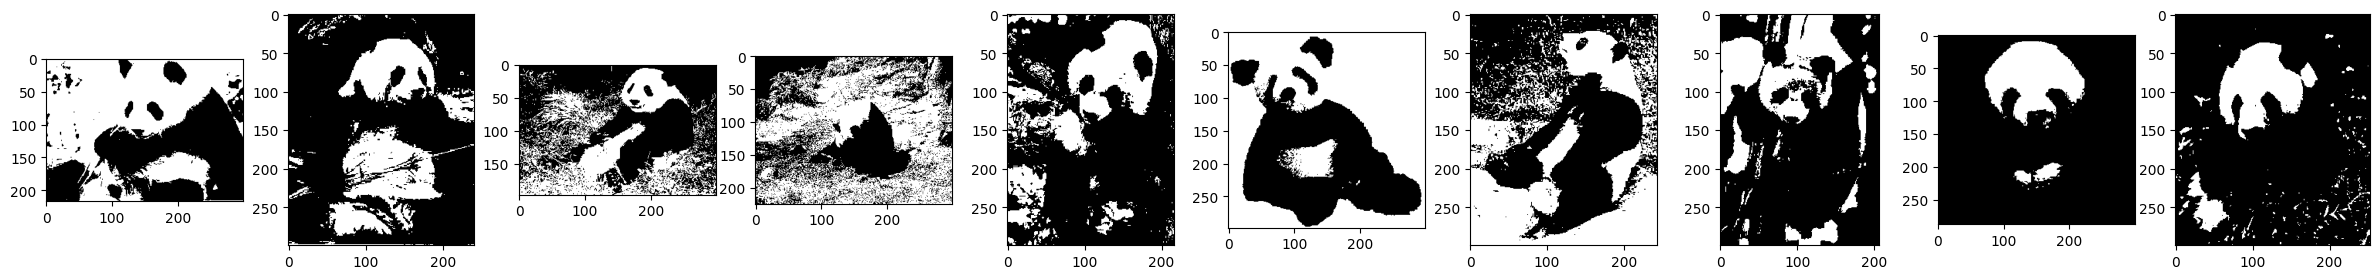

In [5]:
binaries = [image > 0.5 for image in images]
fig, axes = plt.subplots(1, len(binaries), figsize=(30, 3))
for i in range(len(binaries)):
    axes[i].imshow(binaries[i].permute(1,2,0), cmap='gray')

In [ ]:
# implement the binarization by the convolutional neural network
# 1. set up weights manually
# 2. train them from the above dataset
# prefer the simplest possible architecture
# hint: employ sigmoid